# Extracredit homework for the foundations module

In [1]:
#necessary libraries to use

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
from scipy import stats

%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
#loading the data for assignments 1-3
train=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/extraHomework/HE11.csv' , index_col=0 )
test=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/extraHomework/HE12.csv' , index_col=0 )

In [3]:
train.head()

,X1,X2,X3,X4,X5,X6,Y
0,-0.204378,0.245717,-0.878906,0.163081,0.253710,-0.545039,-2.704255
1,1.869868,1.440863,1.199019,0.974374,-0.028469,0.575294,7.741288
2,-0.506132,-2.694264,-0.293922,0.574003,-0.313488,-0.938216,-26.717170
3,-1.345176,-2.071063,-0.329784,-1.542241,-1.795052,-0.375164,5.346446
4,-1.016686,-3.056112,-0.725377,-0.135869,-0.464763,0.490638,-67.189117


### Problem 1 (20% credit)
Perform a multi-variate linear regression given the data provided over the training set (without intercept). Report the statistics and analyze p-values for the regressors. Apply the model to the validation set, compute the R2.

###Solution 1

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     11.08
Date:                Fri, 20 Nov 2015   Prob (F-statistic):             0.0179
Time:                        17:29:10   Log-Likelihood:                -33.387
No. Observations:                  10   AIC:                             78.77
Df Residuals:                       4   BIC:                             80.59
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1           -16.4457     19.341     -0.850      0.4

C:\Users\Neil\Anaconda\lib\site-packages\scipy\stats\stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  int(n))


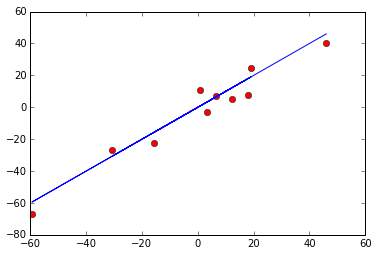

In [4]:
#Regression over training set

lm = smf.ols(formula='Y ~ X1+X2+X3+X4+X5+X6-1', data = train).fit()
print(lm.summary())
lmy1 = lm.predict(train)
plt.plot(lmy1,train.Y,'or')
plt.plot(lmy1,lmy1,'-b') 

##### The p vlues are generally quite bad except for maybe X2 and X5.

The R-sqaured over validation is 0.358197796198


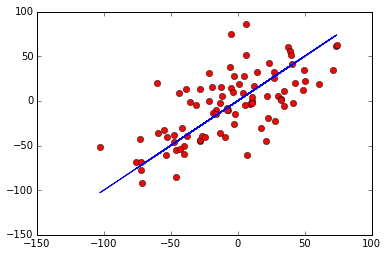

In [5]:
#Regression over validation set

lmy2 = lm.predict(test)
plt.plot(lmy2,test.Y,'or')
plt.plot(lmy2,lmy2,'-b')
R2=1-sum(pow(lmy2-test.Y,2))/sum(pow(test.Y-mean(test.Y),2))
print 'The R-sqaured over validation is',R2  

### Problem 2 (20% credit)
Perform Principle component decomposition for the regressors over the training set. Redo the regression over the training set, report the statistics.

###Solution 2

The variation covered by first three principal components is 0.955002468549


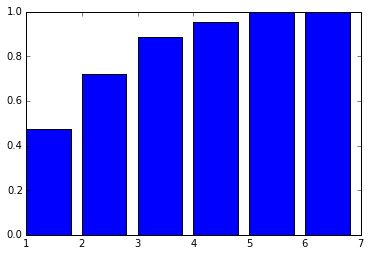

In [6]:
Y = np.matrix(train.Y)
X=np.matrix(train[['X1','X2','X3','X4','X5','X6']])
m = mean(X,0)
s = std(X,0)
X1 = 1.0*np.array(X)
for i in xrange(0,6):
    X1[:,i]=(X1[:,i]-m[0,i])/s[0,i]

U, s, Vt = np.linalg.svd(X1) #singular value decomposition
V = Vt.T
#sort singular values
ind = np.argsort(s)[::-1] 
U = U[:, ind]
s = s[ind]
V = V[:, ind]
S = np.diag(s)
P=X1*np.matrix(V)

sc=cumsum(s**2/sum(s**2))
plt.bar(range(1,(len(sc)+1)),sc)
print'The variation covered by first three principal components is', (sc[3])

In [7]:
pc=pd.DataFrame(P)
pc.columns=['P1','P2','P3','P4','P5','P6']
pc['Y']=Y.transpose()
lm2 = smf.ols(formula='Y ~ P1+P2+P3+P4+P5+P6-1', data=pc).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     11.08
Date:                Fri, 20 Nov 2015   Prob (F-statistic):             0.0179
Time:                        17:29:17   Log-Likelihood:                -33.387
No. Observations:                  10   AIC:                             78.77
Df Residuals:                       4   BIC:                             80.59
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
P1             9.9250      2.021      4.912      0.0

#### The R-sqaured with PCA returns similar value to the normal regression but we get better p-values for the regreessors which are now principal components.

### Problem 3 (20% credit)
Remove the PCs having p-value higher than 5% from the further consideration and define the remaining PCs over the test set (using the transformation learned above over the training set). Redo the regression over the training set and apply the model to the validation set (please note - generally, this is not always the most appropriate way of feature selection).

In [8]:
#Removing PC'S wth p-value over 5%
#and redoing the regression over training set
lm2 = smf.ols(formula='Y ~ P1+P4+P5-1', data=pc).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     10.43
Date:                Fri, 20 Nov 2015   Prob (F-statistic):            0.00564
Time:                        17:29:28   Log-Likelihood:                -39.238
No. Observations:                  10   AIC:                             84.48
Df Residuals:                       7   BIC:                             85.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
P1             9.9250      2.742      3.619      0.0

In [9]:
X1=np.matrix(test[['X1','X2','X3','X4','X5','X6']])
Y1=np.matrix(test['Y'])
X2=1.0*np.array(X1)
P1=X2*np.matrix(V)
lmData=pd.DataFrame(P1)
lmData.columns=[[ 'P1','P2','P3','P4','P5','P6']]
lmData['Y']=Y1.transpose() 
lmP = smf.ols(formula='Y ~ P1+P4+P5-1',data=lmData).fit()
print(lmP.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     203.3
Date:                Fri, 20 Nov 2015   Prob (F-statistic):           6.26e-39
Time:                        17:29:36   Log-Likelihood:                -357.51
No. Observations:                  89   AIC:                             721.0
Df Residuals:                      86   BIC:                             728.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
P1             5.3844      0.886      6.078      0.0

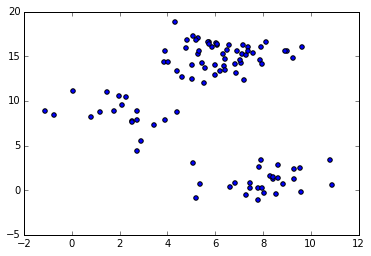

In [10]:
#loading the data for assignments 4-5
data2=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/extraHomework/HE2.csv' , index_col=0 )
plt.scatter(data2.x,data2.y,s=20)

In [11]:
data2.head()

,x,y,c
0,6.831341,14.152972,1
1,7.065457,14.196804,1
2,5.444036,14.269801,1
3,9.644370,16.024389,1
4,5.031005,12.467718,1


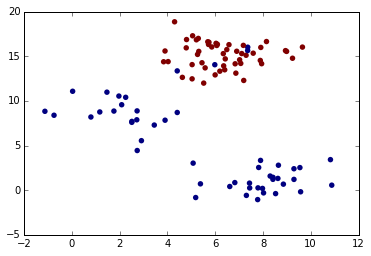

In [12]:
#visualize the "true" test classification for assignment 5
plt.figure()
plt.scatter(data2.x,data2.y,c=data2.c,s=30,lw=0)

### Problem 4 (20% credit)
For the dataset 2 (columns x1,x2), perform k-means clustering with $k=2..10$ and using silhuette measure select the optimal number of clusters. Visualize the corresponding clustering for that $k$.

2 clusters: 0.662827930553
3 clusters: 0.688109843421
4 clusters: 0.497816067245
5 clusters: 0.52571262831
6 clusters: 0.485873780505
7 clusters: 0.400846696786
8 clusters: 0.403141049853
9 clusters: 0.380178213322
10 clusters: 0.386872708593
Best for 3 clusters: 0.688109843421


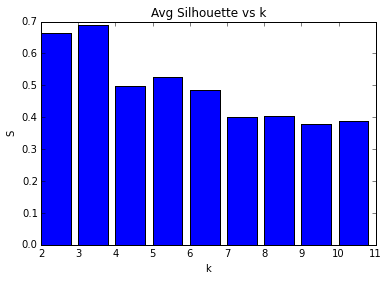

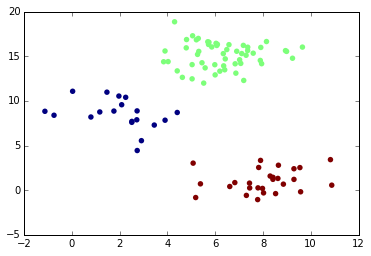

In [13]:
s=[0]*9
for k in range(0,9):
    est=KMeans(n_clusters=k+2,n_init=25)
    est.fit(data2)
    s[k]=silhouette_score(data2, est.labels_)
    print('{0} clusters: {1}'.format(k+2,s[k]))
k=np.argmax(s)    
est=KMeans(n_clusters=k+2,n_init=100)
est.fit(data2)
labels=est.labels_
plt.figure()
plt.bar(range(2,11),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')
print('Best for {0} clusters: {1}'.format(k+2,silhouette_score(data2, labels)))
plt.figure()
plt.scatter (data2.x,data2.y,s=30,c=labels.astype(np.float),lw=0)

### Problem 5 (20% credit)
For the dataset 2 perform logistic regression of c vs x and y and visulize the resulting classification. Compute confusion matrix and output precision, recall and accurary of the classification.

In [14]:
logit = smf.logit('c ~ x+y', data = data2).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.168649
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      c   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Nov 2015   Pseudo R-squ.:                  0.7567
Time:                        17:29:44   Log-Likelihood:                -16.865
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.665e-23
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -10.5947      2.598     -4.079      0.000       -15.686    -5.503
x              0.3959      0.

In [15]:
le=logit.predict(data2) > 0.5

#compute TP,FP,FN,TN for the above classification

TP=sum((data2.c==1)&(le==1))
FP=sum((data2.c==1)&(le==0))
FN=sum((data2.c==0)&(le==1))
TN=sum((data2.c==0)&(le==0))

ConfMat = np.matrix([[TP, FN],[FP, TN]])
print ConfMat

#compute precision, accuracy and recall

ACC=100.0*(TP+TN)/(TP+TN+FP+FN)
Recall=100.0*TP/(TP+FN)
Prec=100.0*TP/(TP+FP)
print('Precision={0}, Accuracy={1}, Recall={2}'.format(Prec,ACC,Recall))

[[50  4]
 [ 0 46]]
Precision=100.0, Accuracy=96.0, Recall=92.5925925926


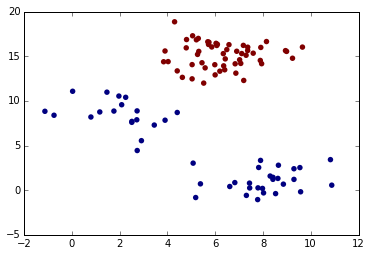

In [16]:
plt.figure()
plt.scatter(data2.x, data2.y,c=le,s=30,lw=0)